# Stellar Evolution Table interpollations
*parse table from csv file*

In [28]:
from pandas import read_csv


df = read_csv('stellar_evolution.csv')
df = df.set_index(df.mass)

## Fitting temperature
*fit of temperature values as $a+bx$*

In [29]:
from scipy.optimize import curve_fit


x = df.index
y = df.temp
popt, _ = curve_fit(lambda x, a, b: a + b * x, x, y)
a, b = popt
a, b

(2598.6586686607316, 2948.6212815383583)

*predict and score interpollated values with a $r^2$ fitness score*

In [30]:
import numpy as np

temp = x.map(lambda x: a + b * x)
r2 = 1 - (np.sum((y - temp) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9861213738000962

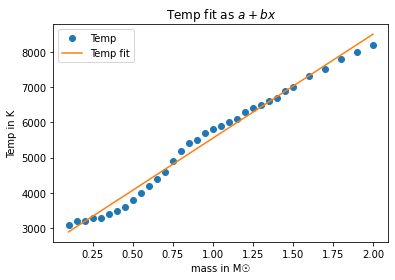

In [31]:
import matplotlib.pyplot as plt


_, ax = plt.subplots()
ax.set_title(r"Temp fit as $a+bx$")
ax.plot(x, y, 'o', label='Temp')
ax.plot(x, temp, '-', label='Temp fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Temp in K')
ax.legend()
plt.show()

## Fitting min an max luminosities
### L-Min fit
*fit of lmin values as $ax^b$*

In [32]:
x = df.index
y = df.l_min
popt, _ = curve_fit(lambda x, a, b: a * x ** b, x, y)
a, b = popt
a, b

(0.8994825154104518, 4.182711149771404)

*predict and score interpollated values with a $r^2$ fitness score*

In [33]:
l_min = x.map(lambda x: a * x ** b)
r2 = 1 - (np.sum((y - l_min) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9981403450049346

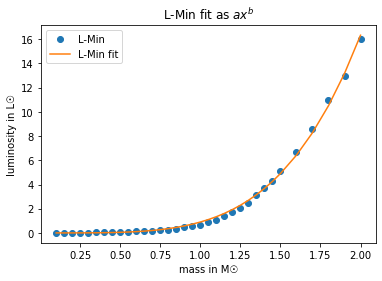

In [34]:
_, ax = plt.subplots()
ax.set_title(r"L-Min fit as $ax^b$")
ax.plot(x, y, 'o', label='L-Min')
ax.plot(x, l_min, '-', label='L-Min fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('luminosity in L☉')
ax.legend()
plt.show()

*all l_min predicted values for mass \[.1, 2.0\] must be greater than 0*

In [35]:
all(v >= 0 for v in l_min)

True

### L-Max fit
*fit of lmax values as $ax^b$*

In [36]:
df_filtered = df[df.index >= .45]
x = df_filtered.index
y = df_filtered.l_max
popt, _ = curve_fit(lambda x, a, b: a * x ** b, x, y)
a, b = popt
a, b

(1.417549268949681, 3.786542028176919)

In [37]:
l_max = x.map(lambda x: a * x ** b)
r2 = 1 - (np.sum((y - l_max) ** 2) / np.sum((y - np.mean(y)) ** 2))
r2

0.9987815353130644

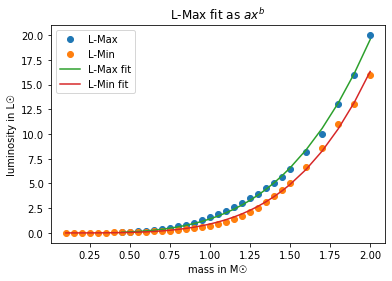

In [38]:
_, ax = plt.subplots()
ax.set_title(r"L-Max fit as $ax^b$")
ax.plot(x, y, 'o', label='L-Max')
ax.plot(df.index, df.l_min, 'o', label='L-Min')
ax.plot(x, l_max, '-', label='L-Max fit')
ax.plot(df.index, l_min, '-', label='L-Min fit')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('luminosity in L☉')
ax.legend()
plt.show()

*all l_max predicted values for mass [.1, 2.0] must be greater than predicted l_min values*

In [39]:
diff = [l_max[i] - l_min[i] for i in range(len(df_filtered.index))]
all(d >= 0 for d in diff)

True